In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [19]:
customers =pd.read_csv("/kaggle/input/zeotap/Customers.csv")
products=pd.read_csv("/kaggle/input/zeotap/Products.csv")
transactions=pd.read_csv("/kaggle/input/zeotap/Transactions.csv")

# Data Understanding

In [20]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [21]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [9]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [22]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [23]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [24]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [15]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [16]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [17]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [25]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# Univariate Analysis

<Axes: title={'center': 'Customer Distribution by Region'}, xlabel='Region'>

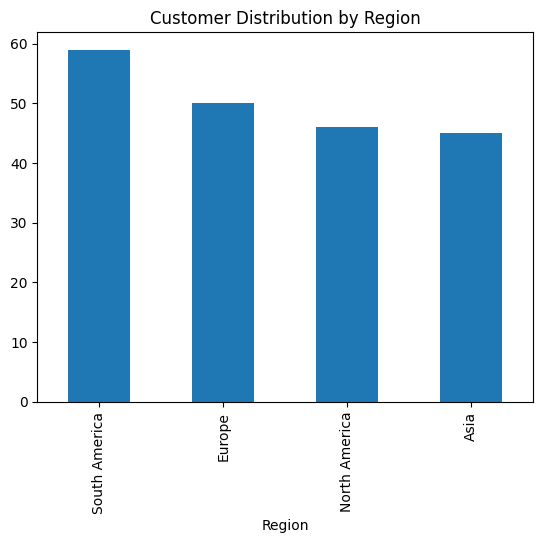

In [26]:
customers['Region'].value_counts().plot(kind='bar', title="Customer Distribution by Region")

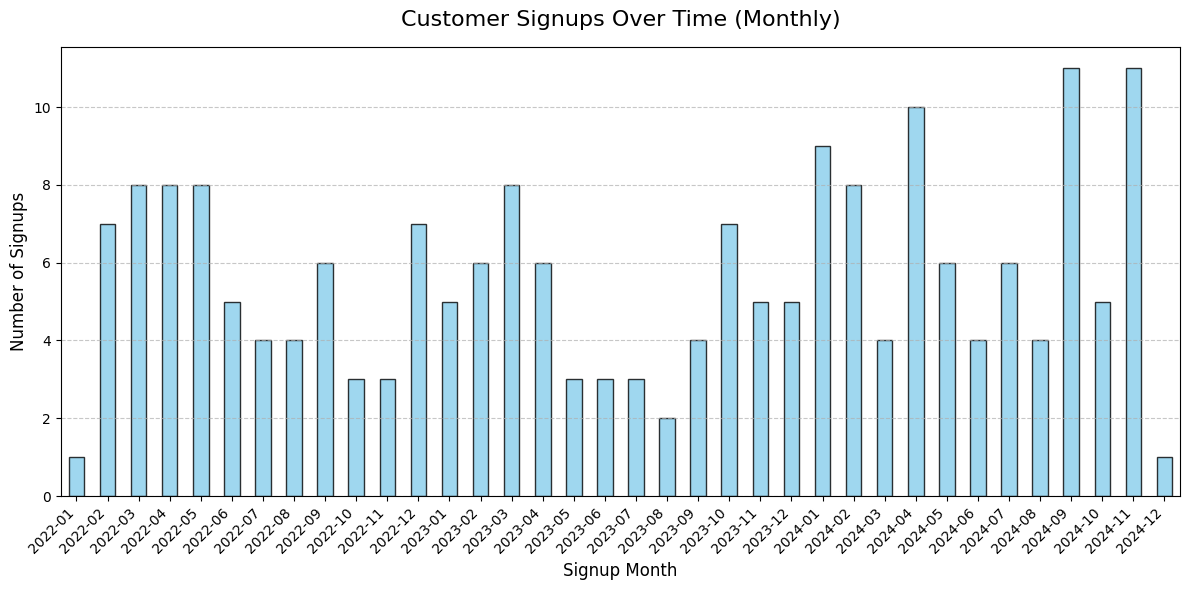

In [29]:
# Convert SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Aggregate signups by month 
signup_monthly = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
signup_monthly.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)

# Add titles and labels
plt.title("Customer Signups Over Time (Monthly)", fontsize=16, pad=15)
plt.xlabel("Signup Month", fontsize=12)
plt.ylabel("Number of Signups", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

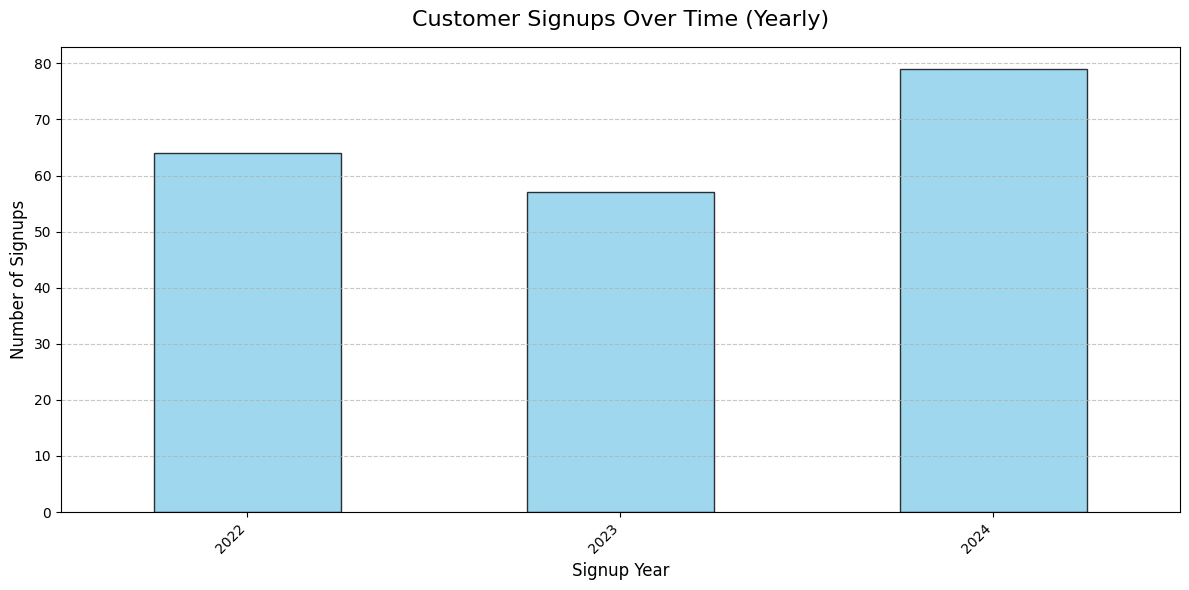

In [36]:
# Convert SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Aggregate signups by year 
signup_yearly = customers['SignupDate'].dt.to_period('Y').value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
signup_yearly.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)

# Add titles and labels
plt.title("Customer Signups Over Time (Yearly)", fontsize=16, pad=15)
plt.xlabel("Signup Year", fontsize=12)
plt.ylabel("Number of Signups", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<Axes: title={'center': 'Products Distribution'}, xlabel='Category'>

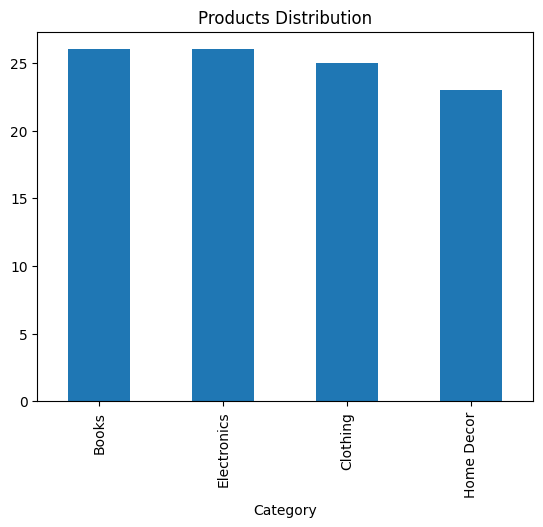

In [31]:
products['Category'].value_counts().plot(kind='bar', title="Products Distribution")

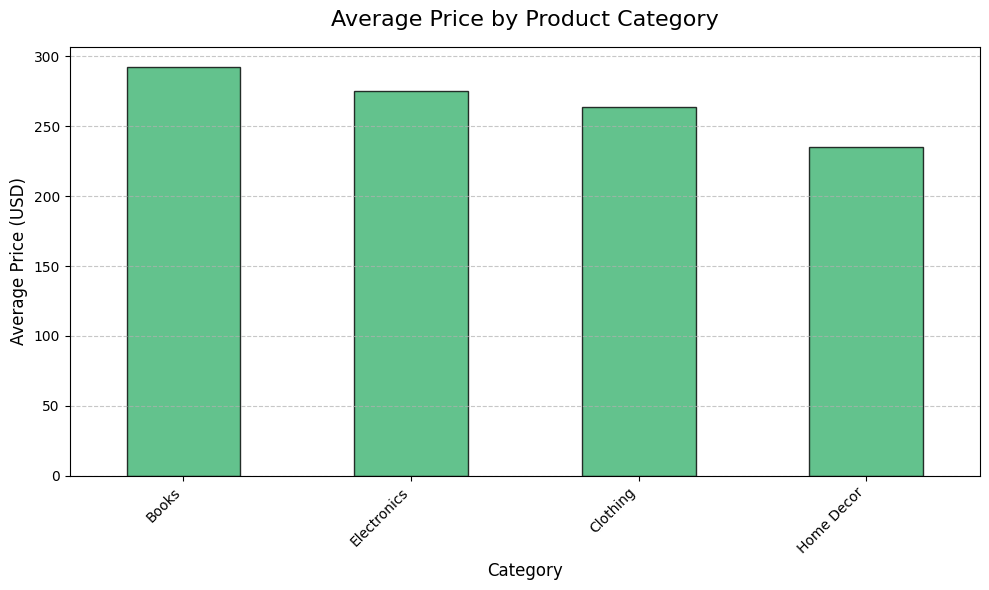

In [32]:
import matplotlib.pyplot as plt

# Calculate the average price by category
avg_price_by_category = products.groupby('Category')['Price'].mean().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
avg_price_by_category.plot(kind='bar', color='mediumseagreen', edgecolor='black', alpha=0.8)

# Add titles and labels
plt.title("Average Price by Product Category", fontsize=16, pad=15)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Average Price (USD)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

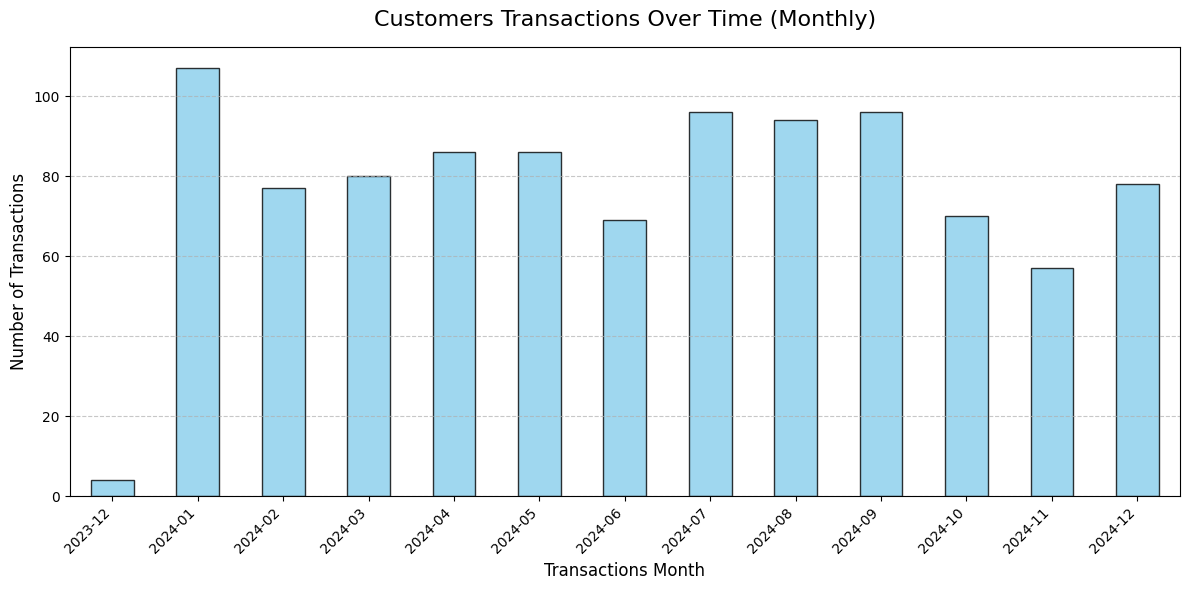

In [37]:
 # Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Aggregate Transactions by month (or year, depending on granularity desired)
Transaction_monthly = transactions['TransactionDate'].dt.to_period('M').value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
Transaction_monthly.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)

# Add titles and labels
plt.title("Customers Transactions Over Time (Monthly)", fontsize=16, pad=15)
plt.xlabel("Transactions Month", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

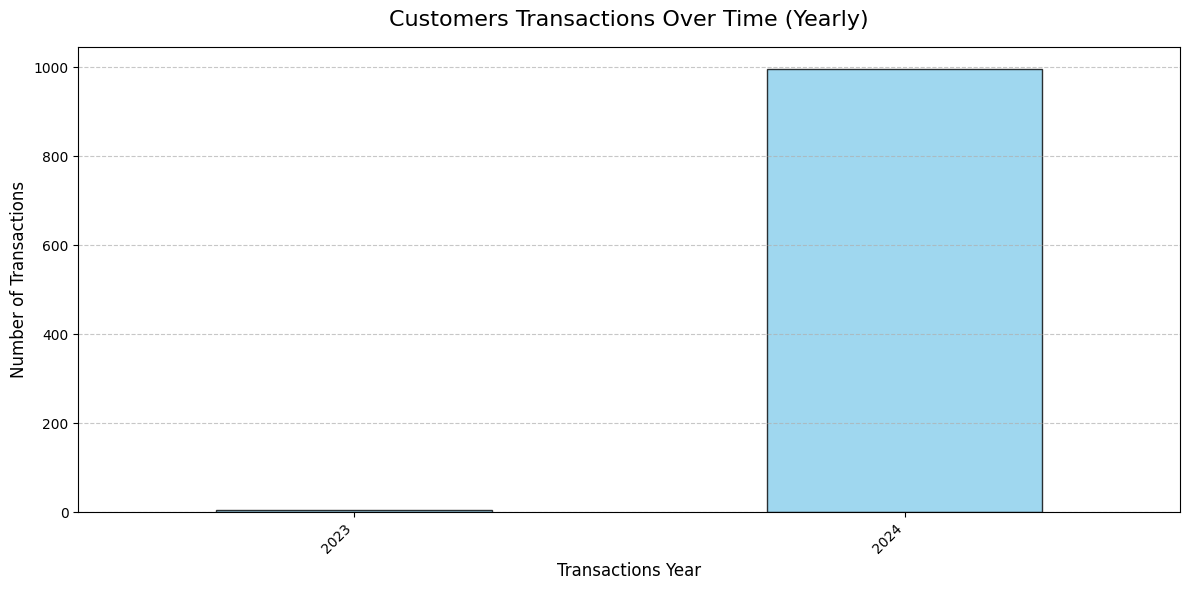

In [38]:
 # Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Aggregate Transactions by month (or year, depending on granularity desired)
Transaction_yearly = transactions['TransactionDate'].dt.to_period('Y').value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
Transaction_yearly.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)

# Add titles and labels
plt.title("Customers Transactions Over Time (Yearly)", fontsize=16, pad=15)
plt.xlabel("Transactions Year", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

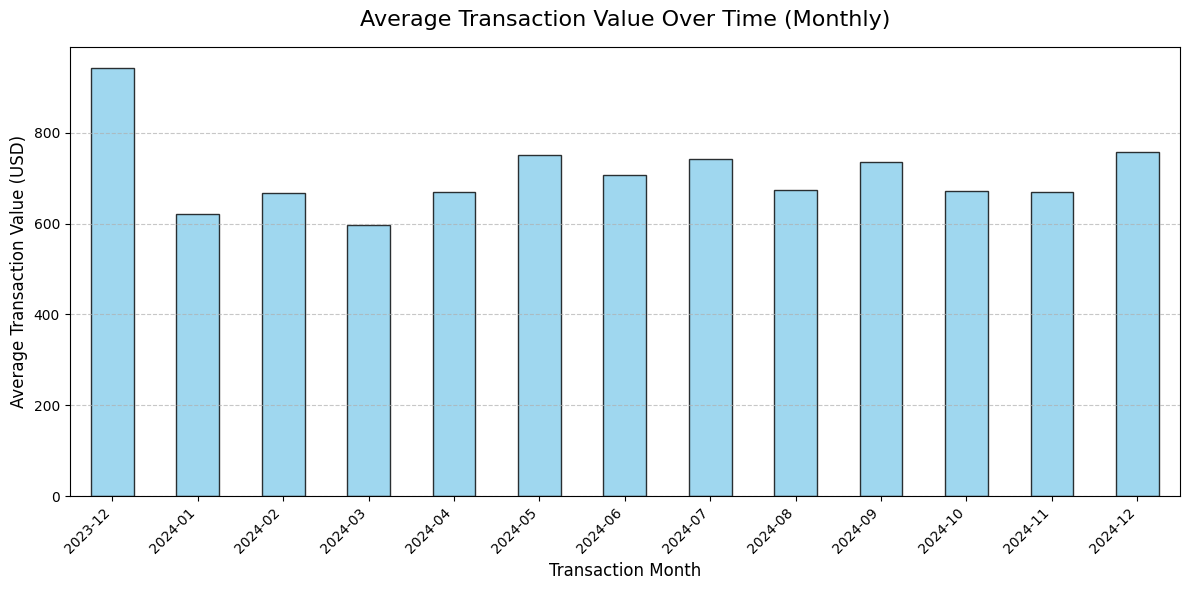

In [34]:
import matplotlib.pyplot as plt

# Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Aggregate Transactions by month and calculate average TotalValue
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')  # Extract the month
avg_totalValue_by_month = transactions.groupby('TransactionMonth')['TotalValue'].mean()

# Plot the data
plt.figure(figsize=(12, 6))
avg_totalValue_by_month.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)

# Add titles and labels
plt.title("Average Transaction Value Over Time (Monthly)", fontsize=16, pad=15)
plt.xlabel("Transaction Month", fontsize=12)
plt.ylabel("Average Transaction Value (USD)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# Bivariate Analysis

<Axes: title={'center': 'Revenue by Region'}, ylabel='TotalValue'>

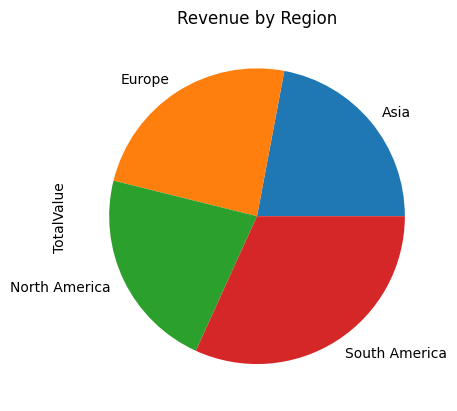

In [42]:
region_revenue = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum()
region_revenue.plot(kind='pie', title="Revenue by Region")

<Axes: title={'center': 'Revenue by Region'}, xlabel='Region'>

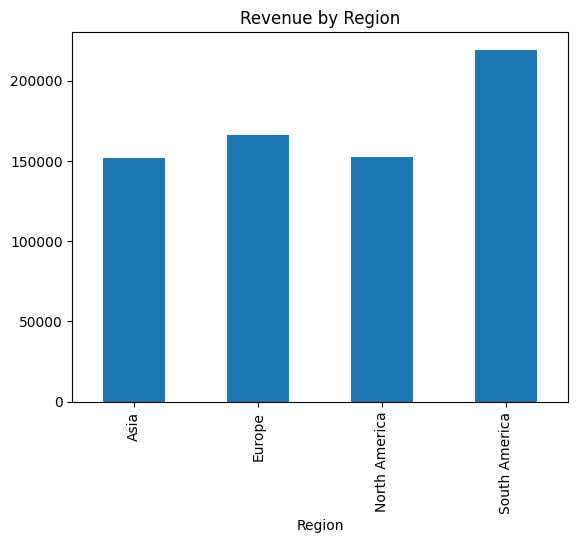

In [43]:
region_revenue.plot(kind='bar', title="Revenue by Region")

<Axes: title={'center': 'Top 10 Products by Quantity Sold'}, xlabel='ProductName'>

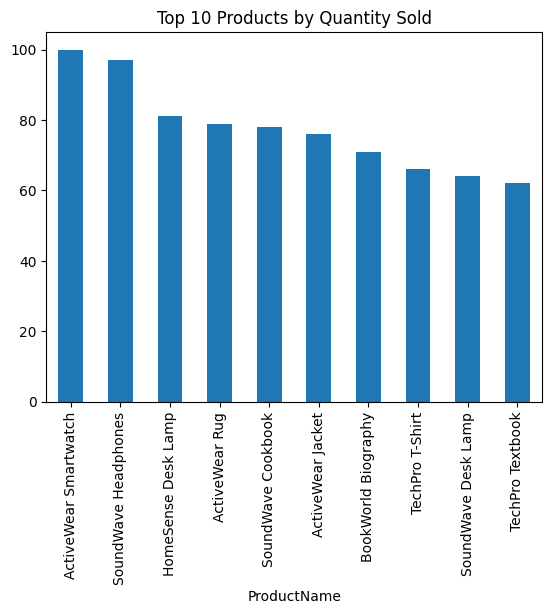

In [44]:
top_products = transactions.merge(products, on='ProductID').groupby('ProductName')['Quantity'].sum()
top_products.sort_values(ascending=False).head(10).plot(kind='bar', title="Top 10 Products by Quantity Sold")

<Axes: title={'center': 'Average Customer Spending by Region'}, xlabel='Region'>

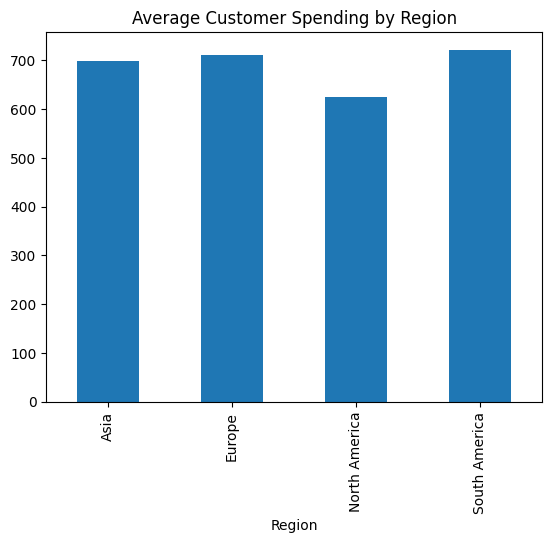

In [46]:
spending_region = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].mean()
spending_region.plot(kind='bar', title="Average Customer Spending by Region")

# Revenue Insights

In [47]:
total_revenue = transactions['TotalValue'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $689,995.56


In [48]:
revenue_per_product = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False)

# Merge with products to get product names
revenue_per_product = revenue_per_product.reset_index().merge(products, on='ProductID', how='left')
print(revenue_per_product[['ProductName', 'TotalValue']].head(10))  # Top 10 products by revenue

                ProductName  TotalValue
0        TechPro Headphones    19513.80
1            ActiveWear Rug    17946.91
2          TechPro Cookbook    17905.20
3         ActiveWear Jacket    15060.92
4           HomeSense Novel    14592.24
5           SoundWave Jeans    13947.20
6        TechPro Smartwatch    13778.88
7     ActiveWear Smartwatch    13671.60
8     ComfortLiving Sweater    13487.95
9  ComfortLiving Smartphone    13232.12


Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


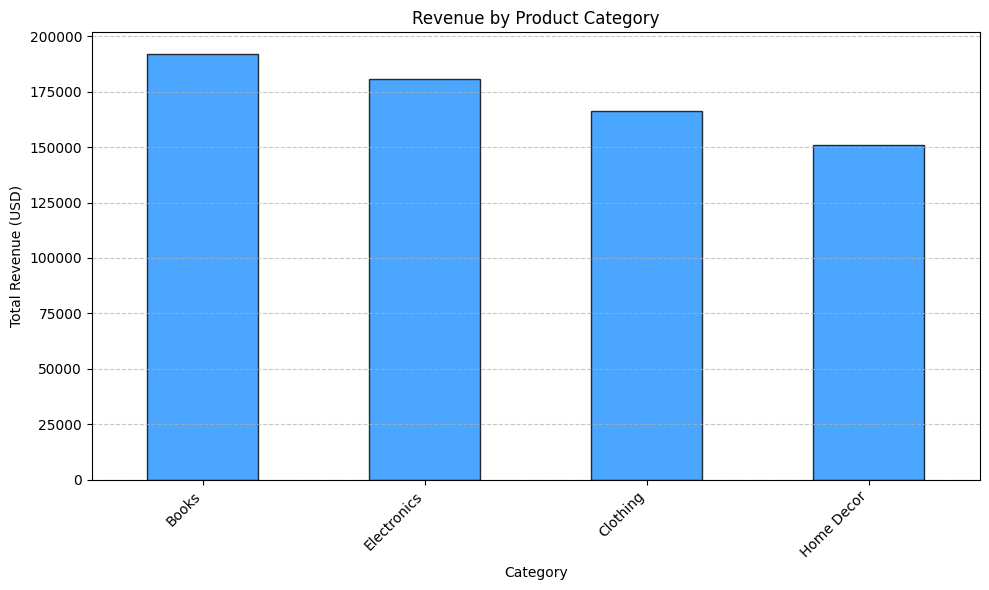

In [49]:
# Merge transactions with products to include category information
transactions_with_products = transactions.merge(products, on='ProductID', how='left')

revenue_per_category = transactions_with_products.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(revenue_per_category)

# Plot revenue by category
revenue_per_category.plot(kind='bar', title="Revenue by Product Category", figsize=(10, 6), color='dodgerblue', edgecolor='black', alpha=0.8)
plt.xlabel("Category")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Customer Behavior

**Repeat Customers vs. One-Time Customers**

In [52]:
repeat_customers = transactions['CustomerID'].value_counts()

# Count customers who have made multiple transactions and single transactions
num_repeat_customers = (repeat_customers > 1).sum()
num_one_time_customers = (repeat_customers == 1).sum()

print(f"Repeat Customers: {num_repeat_customers}")
print(f"One-Time Customers: {num_one_time_customers}")

print(f"Repeat Customers percentage: {100*num_repeat_customers/len(customers)}%")
print(f"One-Time Customers percentage: {100*num_one_time_customers/len(customers)}%")

Repeat Customers: 187
One-Time Customers: 12
Repeat Customers percentage: 93.5%
One-Time Customers percentage: 6.0%


**Average Customer Lifetime Value (CLV)**

In [53]:
# Calculate total revenue per customer
customer_revenue = transactions.groupby('CustomerID')['TotalValue'].sum()

# Calculate CLV as the average of total revenue per customer
average_clv = customer_revenue.mean()
print(f"Average Customer Lifetime Value (CLV): ${average_clv:,.2f}")

Average Customer Lifetime Value (CLV): $3,467.31


# Product Performance

In [54]:
# Profitability: Sum of TotalValue by category
profit_per_category = transactions_with_products.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(profit_per_category.head(10))

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


**Products with Low Sales but High Prices**

In [57]:
# Calculate total sales and average price for each product
product_sales = transactions.groupby('ProductID').agg({'Quantity': 'sum', 'Price': 'mean'})

# Merge with product details
product_sales = product_sales.merge(products, on='ProductID', how='left')

# Filter for products with low sales and high prices
low_sales_high_price = product_sales[(product_sales['Quantity'] < 10) & (product_sales['Price_x'] > 100)]
print(low_sales_high_price[['ProductName', 'Quantity', 'Price_x']])

             ProductName  Quantity  Price_x
30  SoundWave Headphones         9    196.4


# Customer Insights


In [59]:
# Count the number of transactions per customer
customer_order_count = transactions['CustomerID'].value_counts()

# Find the customer with the highest number of orders
top_customer_orders = customer_order_count.idxmax()
top_customer_order_count = customer_order_count.max()

print(f"The customer with the highest number of orders is CustomerID: {top_customer_orders} with {top_customer_order_count} orders.")

The customer with the highest number of orders is CustomerID: C0109 with 11 orders.


In [60]:
# Calculate total money spent per customer
customer_total_spent = transactions.groupby('CustomerID')['TotalValue'].sum()

# Find the customer with the highest money spent
top_customer_spent = customer_total_spent.idxmax()
highest_spent_amount = customer_total_spent.max()

print(f"The customer with the highest money spent is CustomerID: {top_customer_spent} with a total spend of ${highest_spent_amount:,.2f}.")

The customer with the highest money spent is CustomerID: C0141 with a total spend of $10,673.87.
